<a href="https://colab.research.google.com/github/BingHungLee/Heat_Transfer/blob/master/%5BHX_Design%5D_Spray_Condense.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()
import cv2
import numpy as np
from matplotlib import pyplot as plt


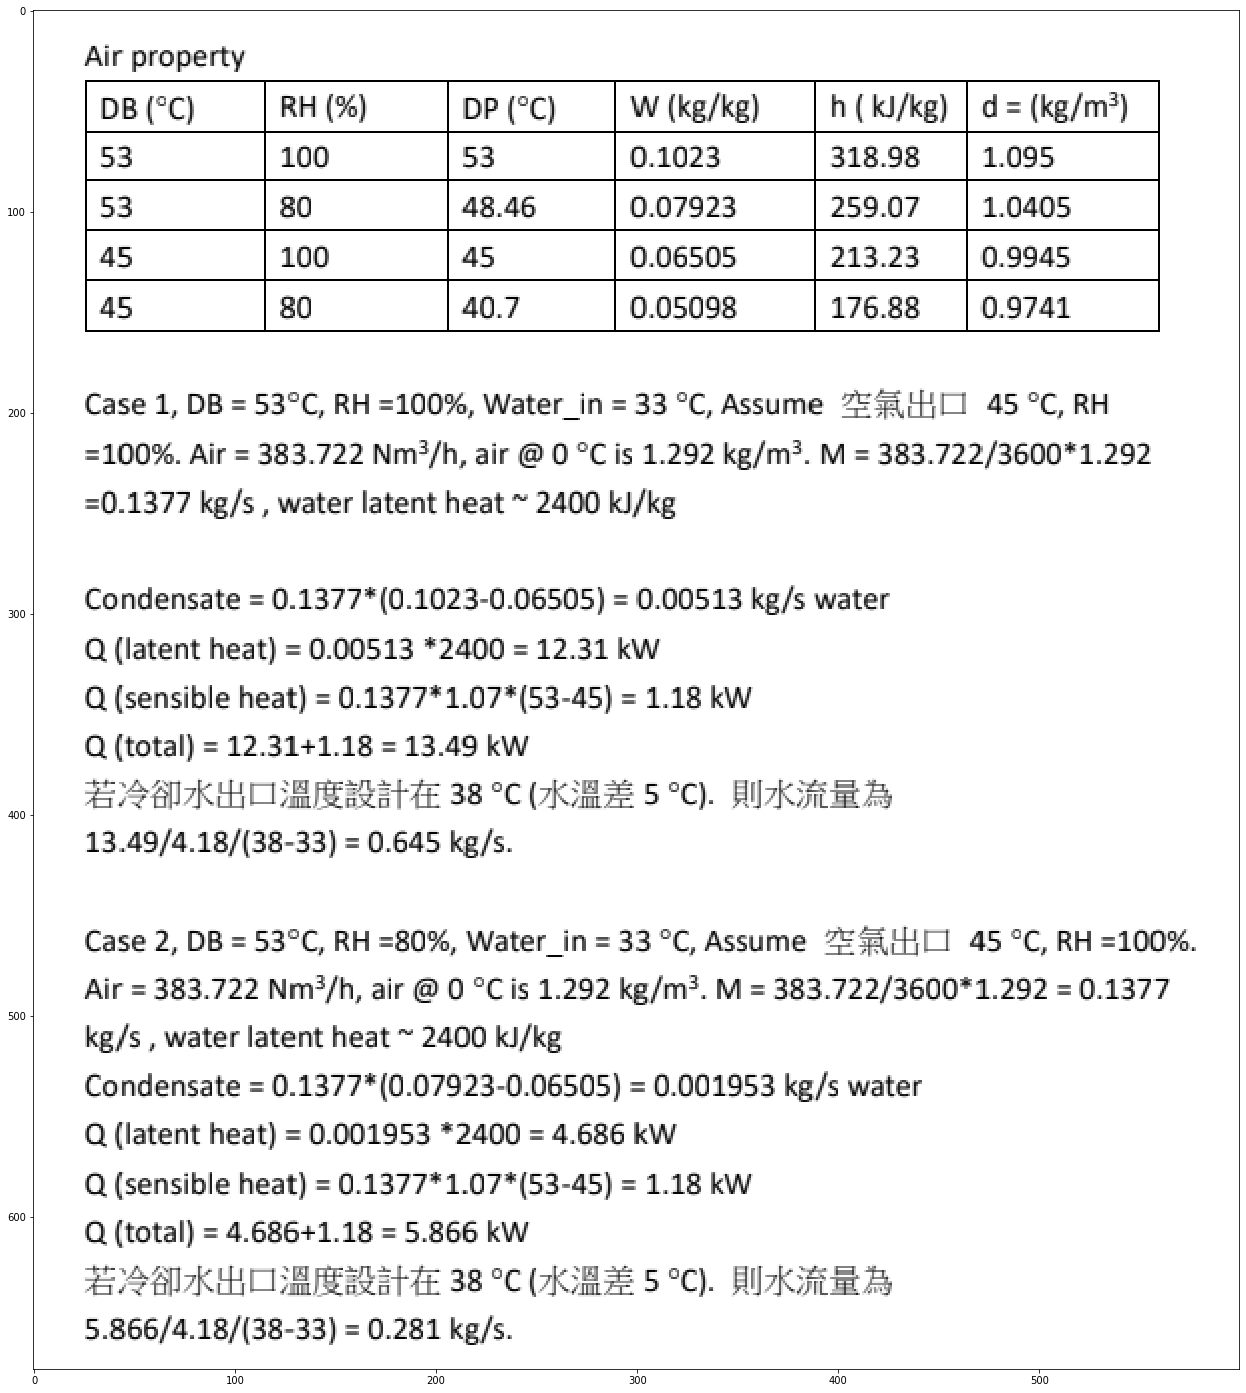

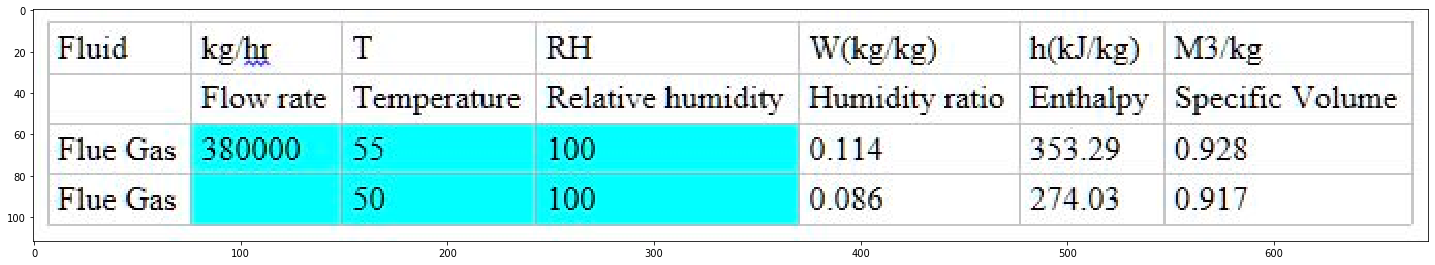

In [2]:
img1 = cv2.imread("SprayCalc.png")
img2 = cv2.imread("SprayCalcTable.JPG")
plt.figure(figsize = (50,25))
plt.imshow(img1)
plt.show()
plt.figure(figsize = (25,10))
plt.imshow(img2)
plt.show()

In [3]:
!pip install CoolProp
from CoolProp.HumidAirProp import HAPropsSI

class HAP():
    
    
    Enthalpy = 0.0
    Humidity_Ratio = 0.0
    Specific_Volume = 0.0
    Wet_Bulb_Temperature = 0.0
    Dew_Point_Temperature = 0.0
    Partial_pressure_of_water_vapor = 0.0
    
    
    def __init__(self,T,P,RH):
        self.Tdb = T+273.15
        self.P = P
        self.RH = RH

    def Set_Prop(self):
        self.Enthalpy = HAPropsSI('H','T',self.Tdb,'P',self.P,'R',self.RH)/1000
        self.Humidity_Ratio = HAPropsSI("W", "T", self.Tdb, "P", self.P, "R",self.RH)
        self.Specific_Volume = HAPropsSI("Vha", "T", self.Tdb, "P",self.P, "R",self.RH)
        self.Wet_Bulb_Temperature = HAPropsSI("Twb", "T", self.Tdb, "P", self.P, "R",self.RH)-273.15
        self.Dew_Point_Temperature = HAPropsSI("Tdp", "T", self.Tdb, "P", self.P, "R",self.RH)-273.15
        self.Partial_pressure_of_water_vapor = HAPropsSI("P_w", "T", self.Tdb, "P", self.P, "R",self.RH)

In [0]:
State1_FR = 380000
State1_T = 55
State1_RH = 100
State1_W = 0.114
State1_h = 353.29
State1_v = 0.928

State2_T = 50
State2_RH = 100
State2_W = 0.086
State2_h = 274.03
State2_v = 0.917

In [5]:

State1 = HAP(55,101325,1)
State1.Set_Prop()
State2 = HAP(50,101325,1)
State2.Set_Prop()

print("------STATE1------")
print("Humidity_Ratio ", State1.Humidity_Ratio)
print("Specific_Volume ", State1.Specific_Volume)
print("Enthalpy ", State1.Enthalpy)


------STATE1------
Humidity_Ratio  0.11532619506042291
Specific_Volume  0.9870399812591714
Enthalpy  355.15032760465914


In [6]:
Condensate = State1_FR/3600*(State1.Humidity_Ratio-State2.Humidity_Ratio) #kg/s water

from CoolProp.CoolProp import PropsSI
Water_Latent_Heat = (PropsSI('H','T',323.15,'Q',1,'Water')-PropsSI('H','T',323.15,'Q',0,'Water'))/1000 #kJ/kg-K
print("Water_Latent_Heat", Water_Latent_Heat , "kJ/kg-K")

Q_Latent = Condensate * Water_Latent_Heat #kW
Q_Sensible = State1_FR/3600*(1/State1.Specific_Volume)*(State1.Tdb-State2.Tdb)
Q_Total = Q_Latent + Q_Sensible 
print("Q_Total", Q_Total)

Water_Latent_Heat 2381.947126540526 kJ/kg-K
Q_Total 7691.173625731018
